# Data classification

In [314]:
import numpy as np 
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from datetime import datetime
from tqdm.notebook import tqdm
import itertools
import seaborn as sns

## 1. Loading the sample data

In [2]:
sample_df = pd.read_pickle("./training-data.pkl")

In [3]:
inputs = np.vstack(sample_df['pca_array'])
targets = sample_df['target'].to_numpy()

## 2. Split into train and test split

In [4]:
X_train, X_test, y_train, y_test =  train_test_split(inputs, targets, train_size=0.7, shuffle = True)

## 3. Loading models

In [307]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC as SupportVectorClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

In [366]:
models_names = ['Random Forest', 'KNN', 'Decision Tree', 'MLP', 
                'Support Vector', 'Lin Stoch-Grad-Desc', 'Nearest Centroid', 'Naive Bayes', 'Gradient Boosting']

In [309]:
models = [RandomForestClassifier(), KNeighborsClassifier(), DecisionTreeClassifier(), MLPClassifier(), 
          SupportVectorClassifier(), SGDClassifier(), NearestCentroid(), GaussianNB(), GradientBoostingClassifier()]

## 4. Using best params obtained from grid search

In [310]:
best_params_RFC = {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 1000}
best_params_KNN = {'leaf_size': 20, 'metric': 'chebyshev', 'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}
best_params_DT = {'max_leaf_nodes': 30, 'min_samples_split': 2}
best_params_MLP = {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (20,), 'solver': 'sgd'}
best_params_SVC = {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
best_params_SGD = {'alpha': 1, 'l1_ratio': 0.05}
best_params_NC = {}
best_params_GNB = {}
best_params_GBC = {'learning_rate': 0.1, 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 5, 
                   'min_samples_split': 0.05, 'n_estimators': 100, 'subsample': 1.0}

best_params = [best_params_RFC, best_params_KNN, best_params_DT, best_params_MLP, 
               best_params_SVC, best_params_SGD, best_params_NC, best_params_GNB, best_params_GBC]


In [311]:
def create_model_accuracies_df(model, model_name, best_params, n = 10):
    model_accuracies_dict = {'model' : [model_name for i in range(n)], 'accuracy' : [], 
                             'time_to_fit' : [], 'time_to_predict' : []}
    for i in tqdm(range(n)):
        model_used = model
        model_used.set_params(**best_params)
        init_time = datetime.now() 
        model_used.fit(X_train, y_train)
        time_to_fit = (datetime.now() - init_time).total_seconds()
        init_time = datetime.now() 
        y_pred = model_used.predict(X_test)
        time_to_predict = (datetime.now() - init_time).total_seconds()
        model_used_accuracy = metrics.accuracy_score(y_test, y_pred)
        model_accuracies_dict['accuracy'].append(model_used_accuracy)
        model_accuracies_dict['time_to_fit'].append(time_to_fit)
        model_accuracies_dict['time_to_predict'].append(time_to_predict)
    model_accuracies_df = pd.DataFrame(model_accuracies_dict)
    return model_accuracies_df

In [321]:
def create_accuracies_df(models, models_names, best_params):
    accuracies_df = pd.DataFrame({'model' : [], 'accuracy' : [], 'time_to_fit' : [], 'time_to_predict' : []})
    for i in range(len(models)):
        print("Computing accuracy of ", models_names[i], " model.")
        accuracies_df = accuracies_df.append(create_model_accuracies_df(models[i], models_names[i], best_params[i]))
    return accuracies_df

In [322]:
accuracies_df1 = create_accuracies_df(models[1:4], models_names[1:4], best_params[1:4])

Computing accuracy of  KNN  model.



Computing accuracy of  Decision Tree  model.



Computing accuracy of  MLP  model.


In [386]:
accuracies_df2 = create_accuracies_df(models[5:], models_names[5:], best_params[5:])

Computing accuracy of  Lin Stoch-Grad-Desc  model.



Computing accuracy of  Nearest Centroid  model.



Computing accuracy of  Naive Bayes  model.



Computing accuracy of  Gradient Boosting  model.


In [333]:
accuracies_df3 = create_accuracies_df(models[4:5], models_names[4:5], best_params[4:5])

Computing accuracy of  Support Vector  model.


In [339]:
accuracies_df4 = create_accuracies_df(models[0:1], models_names[0:1], best_params[0:1])

Computing accuracy of  Random Forest  model.


In [412]:
accuracies_df.head()

,model,accuracy,time_to_fit,time_to_predict
0,KNN,0.7845,0.720076,4.166856
1,KNN,0.7845,0.733040,4.149901
2,KNN,0.7845,0.736047,4.293503
3,KNN,0.7845,0.770937,4.218718
4,KNN,0.7845,0.759968,4.171843


In [411]:
accuracies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 0 to 9
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   model            90 non-null     object 
 1   accuracy         90 non-null     float64
 2   time_to_fit      90 non-null     float64
 3   time_to_predict  90 non-null     float64
dtypes: float64(3), object(1)
memory usage: 6.0+ KB


## 5. Saving dataframe of accuracies into pickle file

In [388]:
accuracies_df = pd.concat([accuracies_df1, accuracies_df2, accuracies_df3, accuracies_df4])

In [346]:
#accuracies_df.to_pickle("./accuracies-df.pkl")

## 6. Plotting accuracies and computation time of classifiers

In [347]:
accuracies_df = pd.read_pickle("./accuracies-df.pkl")

In [441]:
# Removing 3 worse models
accuracies_df_plot = accuracies_df[(accuracies_df.model != 'Nearest Centroid') & (accuracies_df.model != 'Lin Stoch-Grad-Desc') & (accuracies_df.model != 'Naive Bayes')]

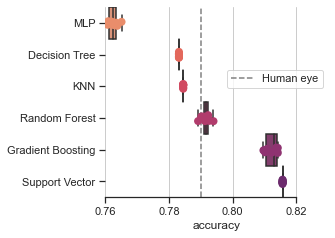

In [442]:
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(4, 3.5))
ax.set_xlim(0.76,0.83)
ax.axvline(0.79, ls='--', label = 'Human eye', color = "grey")
plt.legend(bbox_to_anchor=(1,0.7))

# Plot the orbital period with horizontal boxes
sns.boxplot(x="accuracy", y="model", data=accuracies_df_plot, width=1, palette = "flare", 
           order = ['MLP', 'Decision Tree', 'KNN', 'Random Forest', 'Gradient Boosting', 'Support Vector'])

# Add in points to show each observation
sns.stripplot(x="accuracy", y="model", data=accuracies_df_plot,
              size=8, linewidth=0, palette = "flare",
             order = ['MLP', 'Decision Tree', 'KNN', 'Random Forest', 'Gradient Boosting', 'Support Vector'])

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

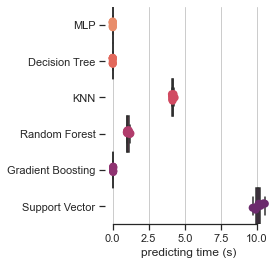

In [447]:
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(3, 4))
#ax.set_xlim(0.76,0.83)
#ax.axvline(0.79, ls='--', label = 'Human eye', color = "grey")
#plt.legend()

# Plot the orbital period with horizontal boxes
sns.boxplot(x="time_to_predict", y="model", data=accuracies_df_plot, width=1, palette = "flare", 
           order = ['MLP', 'Decision Tree', 'KNN', 'Random Forest', 'Gradient Boosting', 'Support Vector'])

# Add in points to show each observation
sns.stripplot(x="time_to_predict", y="model", data=accuracies_df_plot,
              size=8, linewidth=0, palette = "flare",
             order = ['MLP', 'Decision Tree', 'KNN', 'Random Forest', 'Gradient Boosting', 'Support Vector'])

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="", xlabel = "predicting time (s)")
sns.despine(trim=True, left=True)

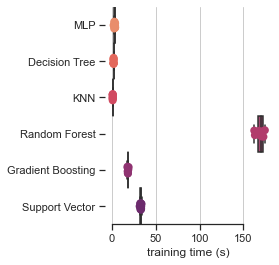

In [446]:
accuracies_df_plot = accuracies_df[(accuracies_df.model != 'Nearest Centroid') & (accuracies_df.model != 'Lin Stoch-Grad-Desc') & (accuracies_df.model != 'Naive Bayes')]

sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(3, 4))
#ax.set_xlim(200, 0)
#ax.axvline(0.79, ls='--', label = 'Human eye', color = "grey")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="time_to_fit", y="model", data=accuracies_df_plot, width=1, palette = "flare", 
           order = ['MLP', 'Decision Tree', 'KNN', 'Random Forest', 'Gradient Boosting', 'Support Vector'])

# Add in points to show each observation
sns.stripplot(x="time_to_fit", y="model", data=accuracies_df_plot,
              size=8, linewidth=0, palette = "flare",
             order = ['MLP', 'Decision Tree', 'KNN', 'Random Forest', 'Gradient Boosting', 'Support Vector'])

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="", xlabel = "training time (s)")
sns.despine(trim=True, left=True)